# Code Challenge
## A journey through the world of Data Science

- You have been provided with this notebook and a dataset of synthetic sales data.
- There are instructions through out the noteook
- Ensure to follow them and do what is required
- There will be extra credits for creativity and innovation in implimentation of the solutions
- Have fun and see the fun that lies in Data

In [ ]:
## Install necessary libraries and any other you may need can be added here
%pip install pandas
%pip install numpy
%pip install matplotlib

In [70]:
## import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

## 1. Import the dataset and run a few basic commands to understand its structure

In [42]:
## 1. Import the dataset
data = pd.read_csv("data1.csv")

In [43]:
## Display the first 10 rows of the dataset
data.head(10)

,id,item,price,date,time,quantity
0,1,Fresh Strawberries,3.99,9/6/2024,9:16 PM,27
1,2,Spaghetti Squash,3.99,11/11/2024,7:25 AM,26
2,3,Blue Denim Jeans,49.99,1/2/2024,4:03 PM,22
3,4,Raspberry Limeade,1.99,9/9/2024,6:38 AM,13
4,5,Wrist Support Brace,19.99,11/16/2024,3:42 PM,7
5,6,Folding Table,59.99,11/27/2024,8:36 PM,29
6,7,Pumpkin Spice Pancake Mix,3.49,7/21/2024,4:10 AM,30
7,8,Cheddar Cheese Crackers,2.29,1/25/2025,9:36 PM,14
8,9,Sliced Strawberries,4.99,6/30/2024,2:55 PM,10
9,10,Wine Glasses,29.99,1/21/2025,10:11 PM,12


In [44]:
## Display the data types of each column
data.dtypes

id            int64
item         object
price       float64
date         object
time         object
quantity      int64
dtype: object

In [45]:
##check for null values
data.isnull().sum()

id          0
item        0
price       0
date        0
time        0
quantity    0
dtype: int64

## 2. 
- Create a new column 'TotalPrice' as the product of 'quantity' and 'price'
- Show the first 5 rows of the updated dataset

In [46]:
## 2.
data['TotalPrice'] = (data['quantity'] * data['price'])

In [47]:
#first 5 rows of the updated dataset
data.head(5)

,id,item,price,date,time,quantity,TotalPrice
0,1,Fresh Strawberries,3.99,9/6/2024,9:16 PM,27,107.73
1,2,Spaghetti Squash,3.99,11/11/2024,7:25 AM,26,103.74
2,3,Blue Denim Jeans,49.99,1/2/2024,4:03 PM,22,1099.78
3,4,Raspberry Limeade,1.99,9/9/2024,6:38 AM,13,25.87
4,5,Wrist Support Brace,19.99,11/16/2024,3:42 PM,7,139.93


In [48]:
#descriptive stats
data.describe()

,id,price,quantity,TotalPrice
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,28.634440,14.715000,429.11221
std,288.819436,51.987361,8.477006,835.36454
min,1.000000,0.890000,1.000000,1.99000
25%,250.750000,3.990000,7.000000,49.78750
50%,500.500000,13.990000,14.000000,131.82000
75%,750.250000,34.990000,22.000000,452.37500
max,1000.000000,899.990000,30.000000,9449.73000


In [49]:
#size
data.shape

(1000, 7)

## 3.
- Group the data by the item and calculate the total quantity sold and the total revenue for each.
- Display the top 10 items by total revenue.

In [50]:
## 3.
# Group by item and aggregate
item_sales_summary = data.groupby('item').agg(
    Total_Quantity_Sold=('quantity', 'sum'),
    Total_Revenue=('TotalPrice', 'sum')
).reset_index()

# Display the top 10 items by Total_Revenue
top_10_items = item_sales_summary.sort_values(by='Total_Revenue', ascending=False).head(10)
print("Top 10 Items by Total Revenue:")
top_10_items

Top 10 Items by Total Revenue:


,item,Total_Quantity_Sold,Total_Revenue
269,Foldable Electric Scooter,45,15749.55
372,Inflatable Paddle Board,27,9449.73
4,Adjustable Pet Grooming Table,83,9129.17
235,Electric Pressure Washer,42,8399.58
1,Adjustable Dumbbells,28,6999.72
582,Robot Vacuum Cleaner,23,6899.77
615,Smart Air Purifier,29,5799.71
245,Electronic Drum Kit,16,5759.84
205,Digital Camera,18,5399.82
272,Folding Table,81,4859.19


## 4.
- Create a new column named time_of_day. Use conditional logic to categorize the transactions based on the hour of the timestamp column:
    - Morning: 6:00 AM - 11:59 AM
    - Afternoon: 12:00 PM - 4:59 PM
    - Evening: 5:00 PM - 8:59 PM
    - Night: 9:00 PM - 5:59 AM

In [ ]:
##4.

data['time'] = pd.to_datetime(data['time'], format='%I:%M %p', errors='coerce').dt.time

# Function to categorize time of day directly from hour
def categorize_time_of_day(t):
    hour = t.hour
    if 6 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 16:
        return "Afternoon"
    elif 17 <= hour <= 20:
        return "Evening"
    else:
        return "Night"

# Create new column
data['time_of_day'] = data['time'].apply(categorize_time_of_day)

# Check result
print(data[['time', 'time_of_day']])


         time time_of_day
0    21:16:00       Night
1    07:25:00     Morning
2    16:03:00   Afternoon
3    06:38:00     Morning
4    15:42:00   Afternoon
..        ...         ...
995  13:36:00   Afternoon
996  14:19:00   Afternoon
997  02:59:00       Night
998  07:54:00     Morning
999  23:06:00       Night

[1000 rows x 2 columns]


In [64]:
#show new dataset ("First ten rows")
data.head(10)

,id,item,price,date,time,quantity,TotalPrice,time_of_day,revenue,price_tier
0,1,Fresh Strawberries,3.99,9/6/2024,21:16:00,27,107.73,Night,107.73,Budget
1,2,Spaghetti Squash,3.99,11/11/2024,07:25:00,26,103.74,Morning,103.74,Budget
2,3,Blue Denim Jeans,49.99,1/2/2024,16:03:00,22,1099.78,Afternoon,1099.78,Premium
3,4,Raspberry Limeade,1.99,9/9/2024,06:38:00,13,25.87,Morning,25.87,Budget
4,5,Wrist Support Brace,19.99,11/16/2024,15:42:00,7,139.93,Afternoon,139.93,Mid-Range
5,6,Folding Table,59.99,11/27/2024,20:36:00,29,1739.71,Evening,1739.71,Premium
6,7,Pumpkin Spice Pancake Mix,3.49,7/21/2024,04:10:00,30,104.70,Night,104.70,Budget
7,8,Cheddar Cheese Crackers,2.29,1/25/2025,21:36:00,14,32.06,Night,32.06,Budget
8,9,Sliced Strawberries,4.99,6/30/2024,14:55:00,10,49.90,Afternoon,49.90,Budget
9,10,Wine Glasses,29.99,1/21/2025,22:11:00,12,359.88,Night,359.88,Premium


## 5.
- Group the data by the time_of_day category (from Step 4) and calculate the total revenue for each period.
- Create a simple bar chart to visualize these four revenue totals.

time_of_day
Morning      116642.10
Afternoon     80429.00
Evening       66832.27
Night        165208.84
Name: revenue, dtype: float64


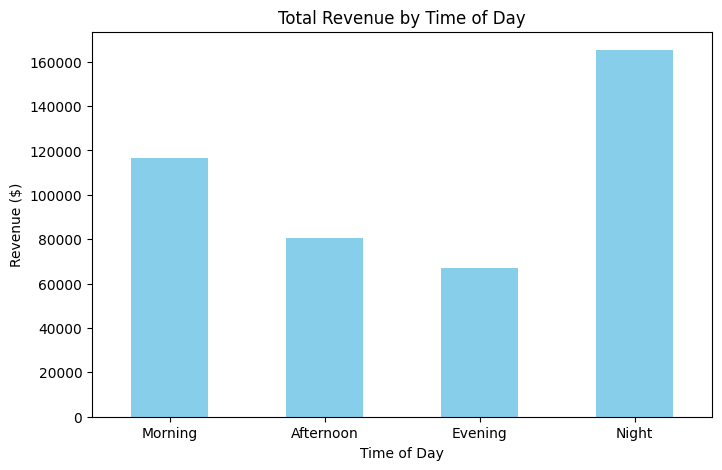

In [ ]:
## 5. 

# 5a: Calculate revenue
data['revenue'] = data['price'] * data['quantity']

# 5b: Group by time_of_day and sum revenue
revenue_by_period = data.groupby('time_of_day')['revenue'].sum().reindex(
    ['Morning', 'Afternoon', 'Evening', 'Night']  # ensures logical order
)

# Display the revenue totals
print(revenue_by_period)

# 5c: Create a simple bar chart
plt.figure(figsize=(8,5))
revenue_by_period.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Time of Day')
plt.ylabel('Revenue ($)')
plt.xlabel('Time of Day')
plt.xticks(rotation=0)
plt.show()


## 6. Total Price Distribution
- Create a histogram to show the Total Price Distribution and give a conclusion on what the graph shows

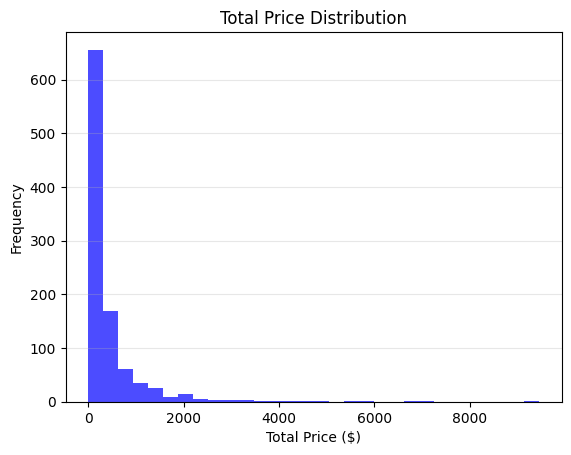

Summary of TotalPrice:
count    1000.00000
mean      429.11221
std       835.36454
min         1.99000
25%        49.78750
50%       131.82000
75%       452.37500
max      9449.73000
Name: TotalPrice, dtype: float64


In [60]:
## 6. Distribution of the 'TotalPrice' column
plt.hist(data['TotalPrice'], bins=30, color='blue', alpha=0.7)
## the rest of the code follows here ...

plt.title('Total Price Distribution')
plt.xlabel('Total Price ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Step 6c: Conclusion
# We can describe the distribution
print("Summary of TotalPrice:")
print(data['TotalPrice'].describe())



## 7. Price tiers to Establish Type of Customer purchase
- Create a new column named price_tier based on the item's unit price:
    - Budget: $\leq \$5.00$
    - Mid-Range: $>\$5.00$ and $\leq \$20.00$
    - Premium: $>\$20.00$

In [61]:
## 7. 

# 7: Categorize items by unit price
def assign_price_tier(price):
    if price <= 5.00:
        return "Budget"
    elif 5.00 < price <= 20.00:
        return "Mid-Range"
    else:  # price > 20.00
        return "Premium"

# Create the new column
data['price_tier'] = data['price'].apply(assign_price_tier)

# Check results
print(data[['item', 'price', 'price_tier']])


                                     item   price price_tier
0                      Fresh Strawberries    3.99     Budget
1                        Spaghetti Squash    3.99     Budget
2                        Blue Denim Jeans   49.99    Premium
3                       Raspberry Limeade    1.99     Budget
4                     Wrist Support Brace   19.99  Mid-Range
..                                    ...     ...        ...
995                     Crispy Tofu Bites    4.99     Budget
996                   Electronic Drum Kit  359.99    Premium
997  Window Bird Feeder with Suction Cups   28.99    Premium
998                   Organic Coconut Oil    8.99  Mid-Range
999                 Peanut Butter Granola    4.99     Budget

[1000 rows x 3 columns]


## 8. Total Sales Distribution
- Create a graph of distribution of total sales for each day of the month
- What insights do you glean from the graph that you have created?

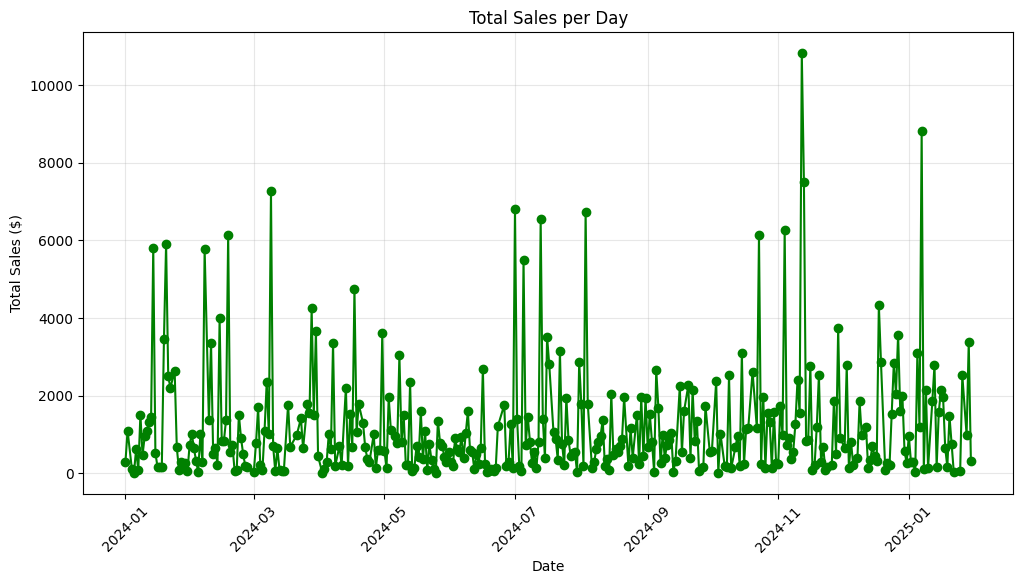

In [65]:
##8.

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Group by date and calculate total sales for each day
daily_sales = data.groupby(data['date'].dt.date)['TotalPrice'].sum()

# Plot the daily sales
plt.figure(figsize=(12,6))
daily_sales.plot(kind='line', marker='o', color='green')
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


In [66]:
# Calculate descriptive statistics for daily total sales
daily_stats = daily_sales.describe()
print("Descriptive Statistics for Daily Total Sales:")
print(daily_stats)

# Identify peak sales days
peak_sales = daily_sales[daily_sales == daily_sales.max()]
print("\nPeak Sales Day(s):")
print(peak_sales)

# Identify low sales days
low_sales = daily_sales[daily_sales == daily_sales.min()]
print("\nLow Sales Day(s):")
print(low_sales)

# Calculate additional stats to detect outliers
Q1 = daily_sales.quantile(0.25)
Q3 = daily_sales.quantile(0.75)
IQR = Q3 - Q1
outliers = daily_sales[(daily_sales < Q1 - 1.5*IQR) | (daily_sales > Q3 + 1.5*IQR)]
print("\nOutlier Day(s):")
print(outliers)


Descriptive Statistics for Daily Total Sales:
count      356.000000
mean      1205.371376
std       1494.270545
min          5.990000
25%        253.872500
50%        711.890000
75%       1536.260000
max      10823.000000
Name: TotalPrice, dtype: float64

Peak Sales Day(s):
date
2024-11-12    10823.0
Name: TotalPrice, dtype: float64

Low Sales Day(s):
date
2024-04-02    5.99
Name: TotalPrice, dtype: float64

Outlier Day(s):
date
2024-01-14     5812.05
2024-01-20     5909.81
2024-02-07     5774.52
2024-02-14     3996.43
2024-02-18     6146.26
2024-03-09     7269.94
2024-03-28     4247.54
2024-03-30     3667.57
2024-04-17     4741.95
2024-04-30     3609.72
2024-07-01     6809.48
2024-07-05     5499.49
2024-07-13     6541.44
2024-07-16     3518.36
2024-08-03     6739.95
2024-10-23     6127.13
2024-11-04     6257.12
2024-11-12    10823.00
2024-11-13     7494.67
2024-11-29     3741.63
2024-12-18     4341.64
2024-12-27     3572.51
2025-01-07     8825.50
Name: TotalPrice, dtype: float64


**Overall Trends**

**Mean daily sales: $1,205.37**
- On average, each day brings in around $1,200 in total sales.
- Median daily sales (50%): $711.89
- Half of the days have sales below $711.89 and half above.
- Since the mean ($1,205) > median ($711.89), the distribution is right-skewed, meaning there are some days with very high sales pulling the average up.

**Standard deviation: $1,494.27**
Sales vary widely from day to day, showing high volatility.

**Peak and Low Sales Days**
- Peak sales day: 2024-11-12 ($10,823)
- A huge spike compared to the mean and median, likely due to either bulk purchases, promotions, or high-value item sales.
- Low sales day: 2024-04-02 ($5.99)
- Very minimal sales, possibly a slow day, off-season, or nearly no transactions.

**Outliers**
- Outlier days include several dates across the year with exceptionally high sales (e.g., 2025-01-07 at $8,825.50, 2024-07-01 at $6,809.48).
- These outliers confirm that a small number of days generate disproportionately high revenue, likely due to special events, promotions, or large orders.
- The presence of multiple high-value outliers explains why the mean is significantly higher than the median.

## 9. Hypothetical Modeling - Discount Impact:

- Using the total revenue, Find the 10 least selling items.
- Save these 10 least selling items in a dataframe called least_selling_items
- Calculate the new total revenue for the whole dataset if a 10% discount was applied to all items in least_selling_items, assuming the quantity sold for each is increased by 20% due to the discount.

In [67]:
## 9: Hypothetical Modeling - Discount Impact

# 1. Calculate total revenue per item
item_revenue = data.groupby('item')['TotalPrice'].sum().sort_values()

# 2. Get the 10 least selling items
least_selling_items = item_revenue.head(10).reset_index()
print("10 Least Selling Items:")
print(least_selling_items)

# 3. Merge to get full details (price and quantity)
least_selling_details = data.merge(least_selling_items[['item']], on='item', how='inner')

# 4. Apply hypothetical discount and increased quantity
least_selling_details['HypotheticalPrice'] = least_selling_details['price'] * 0.9  # 10% discount
least_selling_details['HypotheticalQuantity'] = least_selling_details['quantity'] * 1.2  # 20% increase

# 5. Calculate hypothetical total revenue for these items
least_selling_details['HypotheticalTotalPrice'] = least_selling_details['HypotheticalPrice'] * least_selling_details['HypotheticalQuantity']

# 6. Calculate new total revenue for the entire dataset
# - Total revenue from items NOT in least_selling_items stays the same
remaining_items_revenue = data[~data['item'].isin(least_selling_items['item'])]['TotalPrice'].sum()

# - Total revenue from least selling items after discount
hypothetical_revenue_least = least_selling_details['HypotheticalTotalPrice'].sum()

# 7. New total revenue
new_total_revenue = remaining_items_revenue + hypothetical_revenue_least
print("\nOriginal Total Revenue: $", data['TotalPrice'].sum())
print("New Hypothetical Total Revenue after Discount: $", round(new_total_revenue, 2))


10 Least Selling Items:
                        item  TotalPrice
0  Cherry Almond Protein Bar        1.99
1     Lemon Pepper Seasoning        3.29
2        Hibiscus Herbal Tea        3.29
3            Pasta (Fusilli)        3.58
4       Roasted Garlic Aioli        3.79
5      Artisan Cornbread Mix        4.98
6     Truffle Parmesan Fries        4.99
7      Peanut Butter Granola        4.99
8           Sooji (Semolina)        5.97
9             Tortilla Chips        5.98

Original Total Revenue: $ 429112.21
New Hypothetical Total Revenue after Discount: $ 429115.64


## 10. A little Game
- You are going to find numbers through the work you have done and some you are yet to do.
- The finding of certain numbers... a Game of observations and A Game of dataset knowledge

In [71]:
##--- Pre-calculations for the game ---

# Ensure timestamp column exists
data['timestamp'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['time'].astype(str))

# 1. Highest sales day and its date (for number3)
data['date_only'] = data['timestamp'].dt.date
daily_revenue = data.groupby('date_only')['TotalPrice'].sum()
highest_sales_date = daily_revenue.idxmax()
print("Highest sales date:", highest_sales_date)

# Convert date to string without dashes
date_str = str(highest_sales_date).replace('-', '')  # e.g., '20241112'

# Find the most occurring digits in the date
digit_counts = Counter(date_str)
max_count = max(digit_counts.values())
most_occurring_digits = [int(digit) for digit, count in digit_counts.items() if count == max_count]
print("Most occurring digits in highest sales date:", most_occurring_digits)

# 2. Most frequently bought item (for result calculation)
most_frequent_item = data['item'].mode()[0]
num_letters_most_frequent = len(most_frequent_item.replace(" ", ""))  # exclude spaces
print("Most frequent item:", most_frequent_item)
print("Number of letters in most frequent item (no spaces):", num_letters_most_frequent)

Highest sales date: 2024-11-12
Most occurring digits in highest sales date: [2, 1]
Most frequent item: Glass Water Bottle
Number of letters in most frequent item (no spaces): 16


In [72]:
##--- Game numbers ---

# Number1: Tail of every price (last digit after decimal)
number1 = int(str(data['price'].iloc[0]).split('.')[-1][-1])  # example uses first price
print("number1:", number1)

# Number2: Opposite of omega → alpha = 1
number2 = 1
print("number2:", number2)

# Number3: Smaller number from most occurring digits in highest sales date
number3 = min(most_occurring_digits)
print("number3:", number3)

# Number4: Trash is treasure → last digit of lowest total sale day
low_sales_day = daily_revenue.idxmin()
number4 = int(str(daily_revenue.min()).split('.')[-1][-1])
print("number4:", number4)

# Result using BODMAS: start with number1, add number2, number3, number4, subtract letters in most frequent item
result = number1 + number2 + number3 + number4 - num_letters_most_frequent
print("Final result (int):", int(result))

number1: 9
number2: 1
number3: 1
number4: 9
Final result (int): 4


In [73]:

## a number attached to the tail of every price
number1  = 9

## it is the opposite of omega
number2  = 1

## the smaller number created by the most occuring numbers in a date the store made the highest sales
number3 = 1

## the trash is the treasure
number4  = 9

## Using BODMAS:
## Beyond the of is your start point and chronologcally add symbols till you remove
## the number of letters in the most frequently bought item in the dataset
result = 4
int(result)

4

In [75]:
## find the row at the index of the result
result_index = int(result)

# Get the row at that index
index_row = data.iloc[result_index]
index_row


id                               5
item           Wrist Support Brace
price                        19.99
date           2024-11-16 00:00:00
time                      15:42:00
quantity                         7
TotalPrice                  139.93
time_of_day              Afternoon
revenue                     139.93
price_tier               Mid-Range
timestamp      2024-11-16 15:42:00
date_only               2024-11-16
Name: 4, dtype: object